In [175]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/Users/msokolov/CFI_projects/STO_steps/Deliverables/sto_oer_electrochimacta/figures/print/")

In [178]:
def calc_gmax(dg0, op):
    dg = np.array(dg0)
    if np.size(dg) == 3:
        dg = np.append(dg, 4.92 - sum(dg))
        
    dg = dg - 1.23 - op
        
    gmax = np.concatenate((np.cumsum(dg), np.cumsum(dg[1:]), np.cumsum(dg[2:]), np.cumsum(dg[3:])))
    
    position_matrix = []
    for i in range(4):
        for j in range(4-i):
            position_matrix.append([i, j+i+1])
            
    gmax_value = max(gmax)
    gmax_position = position_matrix[np.argmax(gmax)]
    
    return (gmax_value, gmax_position)


In [179]:
# def gmax01(dg, ax=None):

def g_plot(dg0, u=0, print_labels=False, ax=None, **kwargs):
    dg = np.array(dg0)
    dg = dg - u
    
    u_plot = np.cumsum(dg)
    u_plot = np.concatenate(([0], u_plot, [4.92-u*4, 4.92-u*4]))
    
    if ax is None:
        ax = plt.gca() 
        
    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    right_side.set_visible(False)
    top_side.set_visible(False)

    ax.set_xticks([])
    ax.set_xlim(0, 5.5)
    ax.set_ylabel('Free Energy, eV')
    ax.set_xlabel('Reaction coordinate')
    
    ax.step(np.array(range(len(u_plot))), u_plot, where='post', **kwargs)

#     ax.text(3.9, u_plot[-2], r'$U_\mathrm{RHE}=$'+"{:.2f}".format(u)+' V', fontdict=None, va='top', rotation = 0)
    
    ax.text(0.95, -0.01, r'$U_\mathrm{RHE}=$'+"{:.2f}".format(u)+' V',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='k', fontsize=12)
    
    if print_labels:
        ax.text(0.05, u_plot[0], r"$^*$", fontdict=None, va='bottom', rotation = 0, size = 12)
        ax.text(1.05, u_plot[1], r"$^*$OH", fontdict=None, va='bottom', rotation = 0, size = 12)
        ax.text(2.05, u_plot[2], r"O$^*$", fontdict=None, va='bottom', rotation = 0, size = 12)
        ax.text(3.05, u_plot[3], r"$^*$OOH", fontdict=None, va='bottom', rotation = 0, size = 12)
        ax.text(4.05, u_plot[4], r"$^* + $O$_2$", fontdict=None, va='bottom', rotation = 0, size = 12)

def g_plot_0(dg0, ax=None):
    dg0 = np.array(dg0)
    if ax is None:
        ax = plt.gca()
    
    scaling_value = "{:.2f}".format(dg0[1]+dg0[2])
    g_plot(dg0, u=0, print_labels=True, ax=ax)
    
    ax.annotate('',
        xy=(3.66, dg0.sum()),
        xytext=(3.66, dg0[0]),
        arrowprops={'arrowstyle':'<->', 'shrinkA': 0, 'shrinkB': 0})
    
    ax.text(3.70, (dg0.sum()+dg0[0])/2, scaling_value+' eV', fontdict=None, va='center', rotation = 270)
    
def g_plot_eq(dg0, ax=None):
    dg0 = np.array(dg0)
    if ax is None:
        ax = plt.gca()
    g_plot(dg0, u=1.23, print_labels=True, ax=ax, c='olivedrab')
    dg0 = dg0 - 1.23
    optd_position = np.argmax(dg0)+1
    optd_value = max(dg0)
    
    ax.text(optd_position + 0.27,
         sum(dg0[:optd_position-1])/2 + sum(dg0[:optd_position])/2,
         r'$\eta_\mathrm{TD} = $' + '{:.2f}'.format(optd_value)+' V',
         fontdict=None,
         va='center',
         rotation = 270,
         size=12)
    
    ax.annotate('',
         xy=(optd_position + 0.25, sum(dg0[:optd_position])),
         xytext=(optd_position + 0.25, sum(dg0[:optd_position-1])),
         arrowprops={'arrowstyle':'<->', 'shrinkA': 0, 'shrinkB': 0})

def g_plot_gmax(dg0, op, ax=None):
    dg0 = np.array(dg0)
    if ax is None:
        ax = plt.gca()
    g_plot(dg0, u=1.23+op, print_labels=True, ax=ax, c='darkorange')
    dg = np.append(dg0, 4.92 - sum(dg0))
    dg = dg0 - 1.23 - op
    
    gmax, pos = calc_gmax(dg0, op)
#     ax.text(3, -op, r'$G_{max}$(' + '{:.2f}'.format(op) + ' V) = ' +  '{:.2f}'.format(gmax)+' eV', fontdict=None, va='center', rotation = 0)
    
    ax.annotate('',
         xy=(pos[1] + 0.25, sum(dg[:pos[1]])),
         xytext=(pos[1] + 0.25, sum(dg[:pos[0]])),
         arrowprops={'arrowstyle':'<->', 'shrinkA': 0, 'shrinkB': 0})
    
    ax.annotate(r'$G_{max}$(' + '{:.2f}'.format(op) + ' V) = ' +  '{:.2f}'.format(gmax)+' eV',
                xy = ( pos[1] + 0.25, (sum(dg[:pos[1]]) + sum(dg[:pos[0]]))/2 ),
                xytext = (3, -op),
                arrowprops={'arrowstyle': '->',
                            'shrinkA': 3,
                            'shrinkB': 3,
                            'connectionstyle':"arc3,rad=0.4",
                            'ls': '--',
                            'color': 'grey',
                            'alpha': 0.5})

def g_plot_all(series, freeze_series, title, axes):
    g_plot_0(series, ax = axes[0,0])
    g_plot_eq(series, ax = axes[0,1])
    g_plot_gmax(series, 0.1, ax = axes[0,2])

    g_plot_0(freeze_series, ax = axes[1,0])
    g_plot_eq(freeze_series, ax = axes[1,1])
    g_plot_gmax(freeze_series, 0.1, ax = axes[1,2])
# 
    #stolen
    for i, ax in enumerate(fig.axes):
        ax.set_ylabel("")
        ax.set_xlabel("")

    axes[0,1].set_title(title, y=1.1, fontsize=18)
    axes[0,0].set_ylabel("Not frozen", fontsize=10, rotation=0, ha='right')
    axes[1,0].set_ylabel("Frozen", fontsize=10, rotation=0,  ha='right')



    # stolen
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Reaction coordinate", fontsize=16)
    plt.ylabel("Free energy / eV", fontsize=16)

In [180]:
ridge = [1.27509, 0.95233, 1.35941]

# sequence: Slope OH, Slope O_dang, Slope OOH, Slope O, Slope OOH_min
slope_all = [1.55643, 2.47024, 0.96278, 1.44204, 1.09428]
slope_Odang_OOH = [slope_all[i] for i in [0,1,2]]
slope_Odang_OOHmin = [slope_all[i] for i in [0,1,4]]
slope_O_OOH = [slope_all[i] for i in [0,3,2]]
slope_O_OOHmin = [slope_all[i] for i in [0,3,4]]

# sequence: Slope OH, Slope O_dang, Slope OOH, Slope O, Slope OOH_min
flat_all = [1.56424, 1.90177, 1.15137, 1.88591, 1.24000]
flat_Odang_OOH = [flat_all[i] for i in [0,1,2]]
flat_Odang_OOHmin = [flat_all[i] for i in [0,1,4]]
flat_O_OOH = [flat_all[i] for i in [0,3,2]]
flat_O_OOHmin = [flat_all[i] for i in [0,3,4]]

freeze_ridge = [1.58059, 0.86429, 1.09816]

# sequence: Slope OH, Slope O_dang, Slope OOH, Slope O, Slope OOH_min
freeze_slope_all = [1.71622, 2.43163, 0.85811, 1.25801, 1.04625] 
freeze_slope_Odang_OOH =  [freeze_slope_all[i] for i in [0,1,2]]
freeze_slope_Odang_OOHmin = [freeze_slope_all[i] for i in [0,1,4]]
freeze_slope_O_OOH = [freeze_slope_all[i] for i in [0,3,2]]
freeze_slope_O_OOHmin = [freeze_slope_all[i] for i in [0,3,4]]

# sequence: Slope OH, Slope O_dang, Slope OOH, Slope O, Slope OOH_min
freeze_flat_all = [1.62303, 1.86076, 1.20272, 1.79109, 1.24000]
freeze_flat_Odang_OOH =  [freeze_flat_all[i] for i in [0,1,2]]
freeze_flat_Odang_OOHmin = [freeze_flat_all[i] for i in [0,1,4]]
freeze_flat_O_OOH = [freeze_flat_all[i] for i in [0,3,2]]
freeze_flat_O_OOHmin = [freeze_flat_all[i] for i in [0,3,4]]

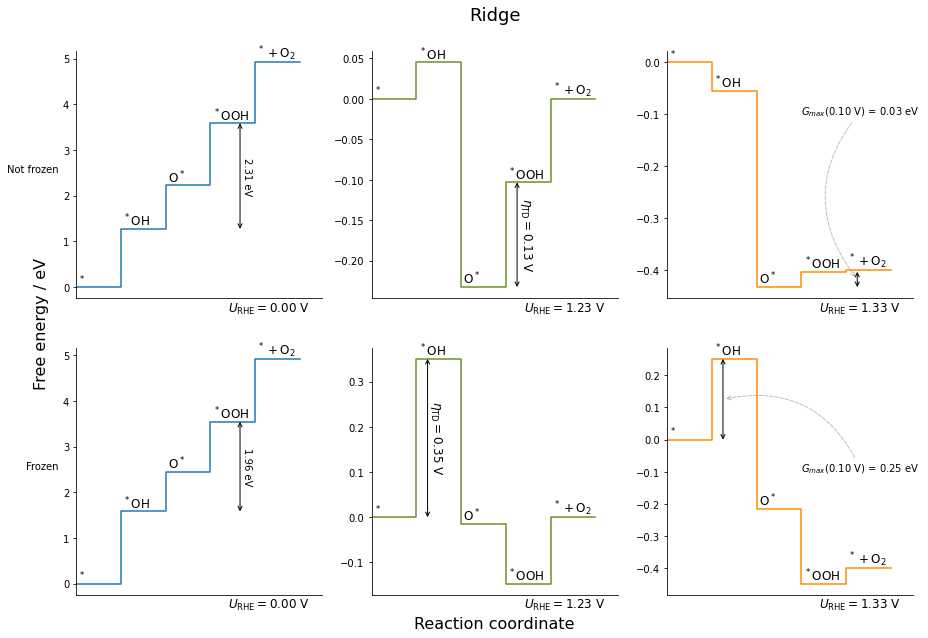

In [6]:
# ridge
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(ridge, freeze_ridge, "Ridge", axes)
plt.savefig("ridge.pdf", format='pdf') 
plt.show()



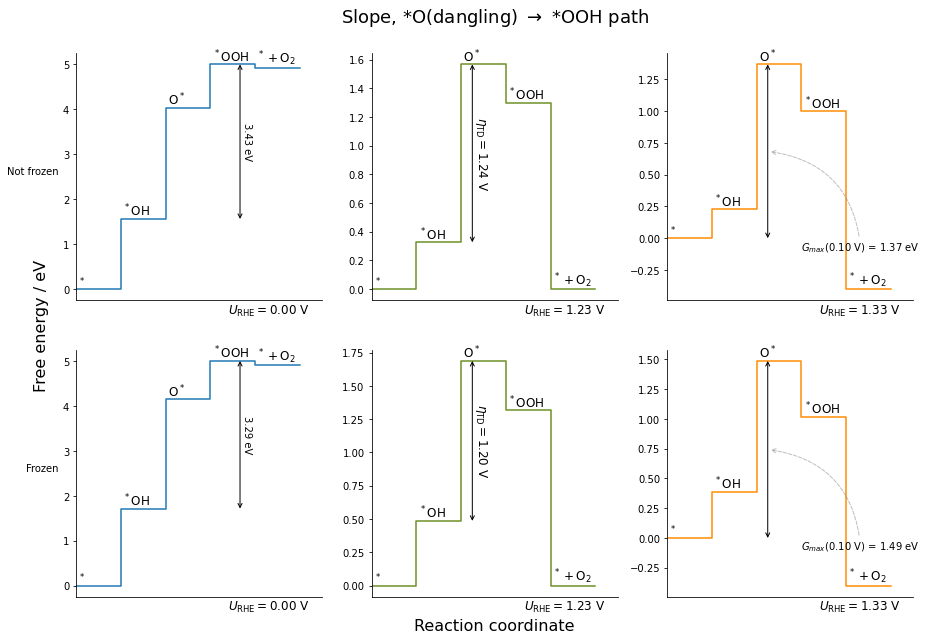

In [192]:
# slope 0
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(slope_Odang_OOH, freeze_slope_Odang_OOH, "Slope, standard path", axes)
axes[0,1].set_title(r'Slope, *O(dangling) $\rightarrow$ *OOH path', y=1.1, fontsize=18)
plt.savefig("slope_standard.pdf", format='pdf') 
plt.show()

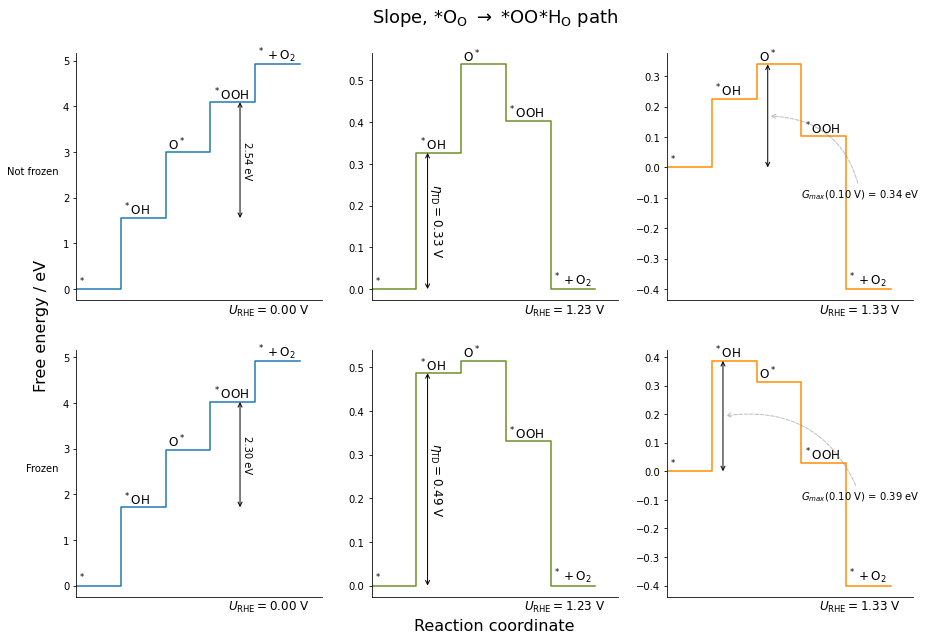

In [193]:
# slope -1
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(slope_O_OOHmin, freeze_slope_O_OOHmin, "Slope, path of most stable intermediates", axes)
axes[0,1].set_title(r'Slope, *O$_\mathrm{O}$ $\rightarrow$ *OO*H$_\mathrm{O}$ path', y=1.1, fontsize=18)
plt.savefig("slope_min.pdf", format='pdf') 
plt.show()



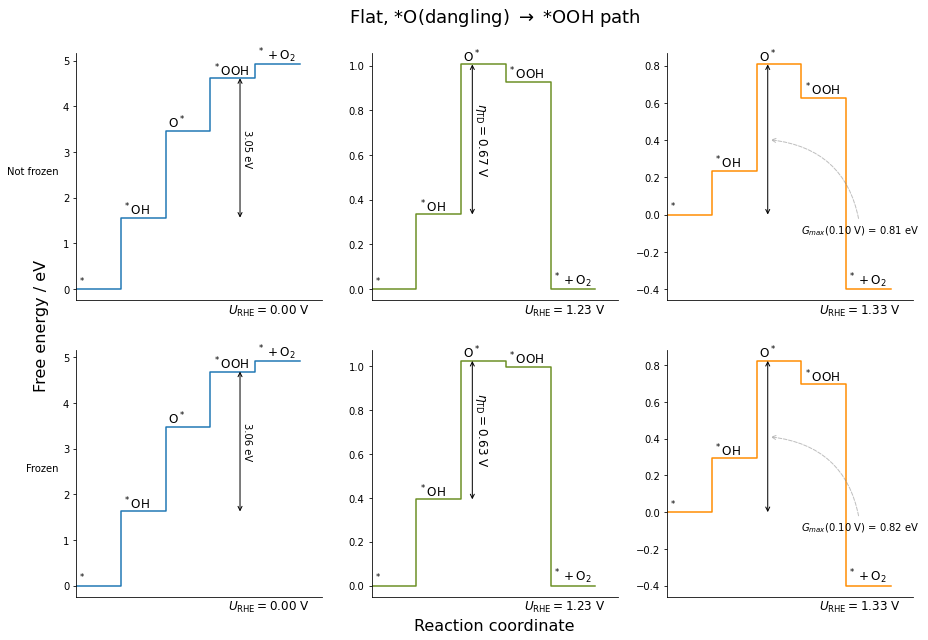

In [194]:
# flat 0
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(flat_Odang_OOH, freeze_flat_Odang_OOH, "Flat, standard path", axes)
axes[0,1].set_title(r'Flat, *O(dangling) $\rightarrow$ *OOH path', y=1.1, fontsize=18)
plt.savefig("flat_standard.pdf", format='pdf') 
plt.show()


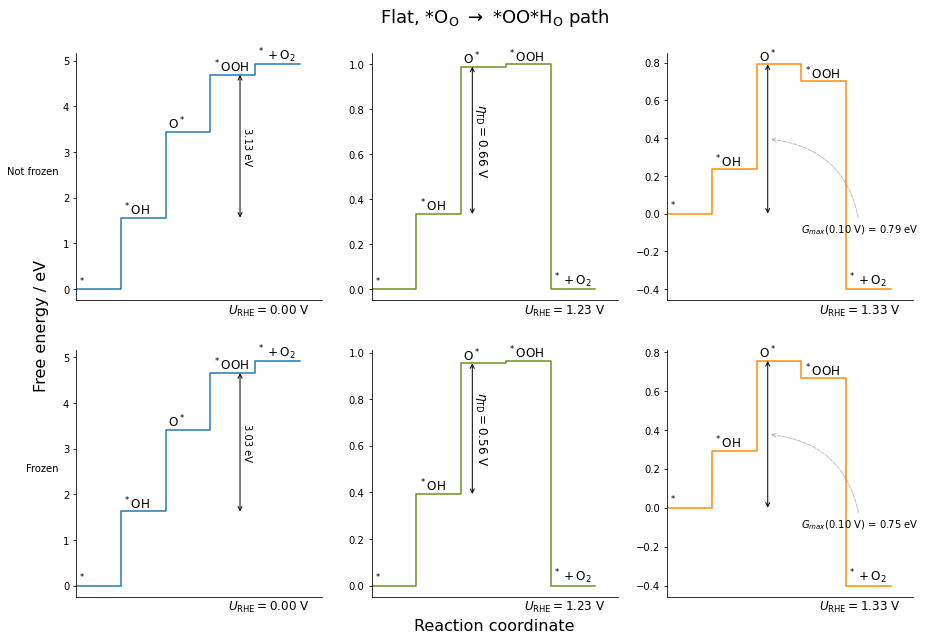

In [195]:
# flat -1
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(flat_O_OOHmin, freeze_flat_O_OOHmin, "Flat, path of most stable intermediates", axes)
axes[0,1].set_title(r'Flat, *O$_\mathrm{O}$ $\rightarrow$ *OO*H$_\mathrm{O}$ path', y=1.1, fontsize=18)
plt.savefig("flat_min.pdf", format='pdf') 
plt.show()

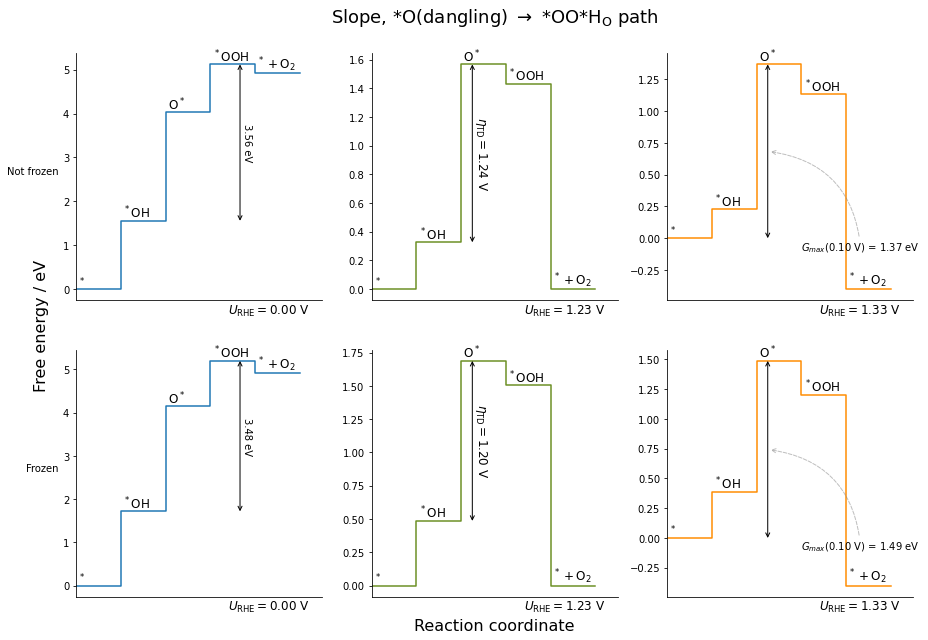

In [196]:
# slope Odang - HOOmin
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(slope_Odang_OOHmin, freeze_slope_Odang_OOHmin, "Slope, O-dangling and OOH-min", axes)
axes[0,1].set_title(r'Slope, *O(dangling) $\rightarrow$ *OO*H$_\mathrm{O}$ path', y=1.1, fontsize=18)
plt.savefig("slope_odang_oohmin.pdf", format='pdf') 
plt.show()

# impacts only SRI

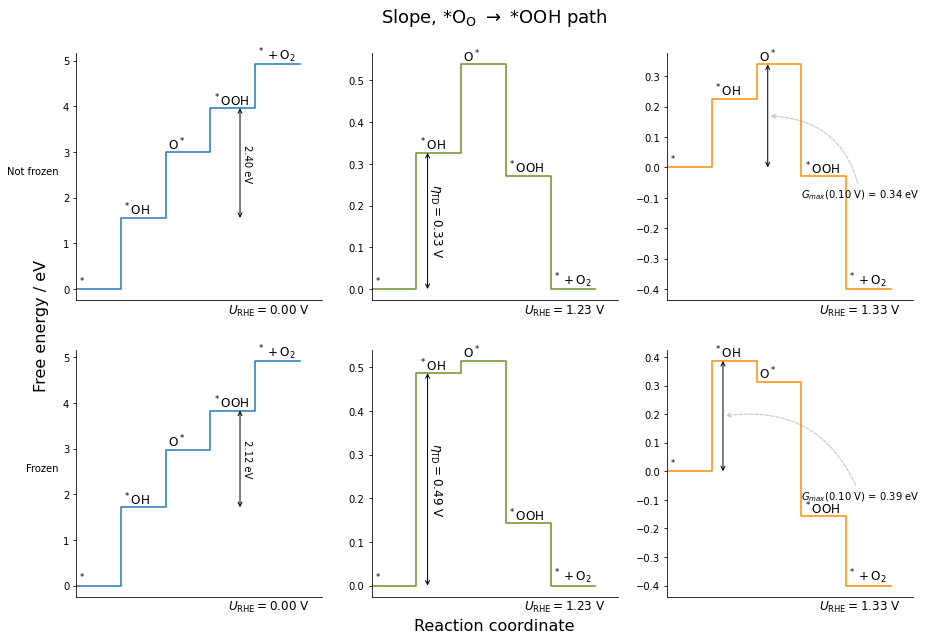

In [198]:
# slope O - HOO
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(slope_O_OOH, freeze_slope_O_OOH, "Slope, O(2) and OOH-standard", axes)
axes[0,1].set_title(r'Slope, *O$_\mathrm{O}$ $\rightarrow$ *OOH path', y=1.1, fontsize=18)
plt.savefig("slope_o2_ooh.pdf", format='pdf') 
plt.show()

# SRI might be too low, but 

# plt.savefig(str(idx)+"_correctpath" +'.pdf', format='pdf')  

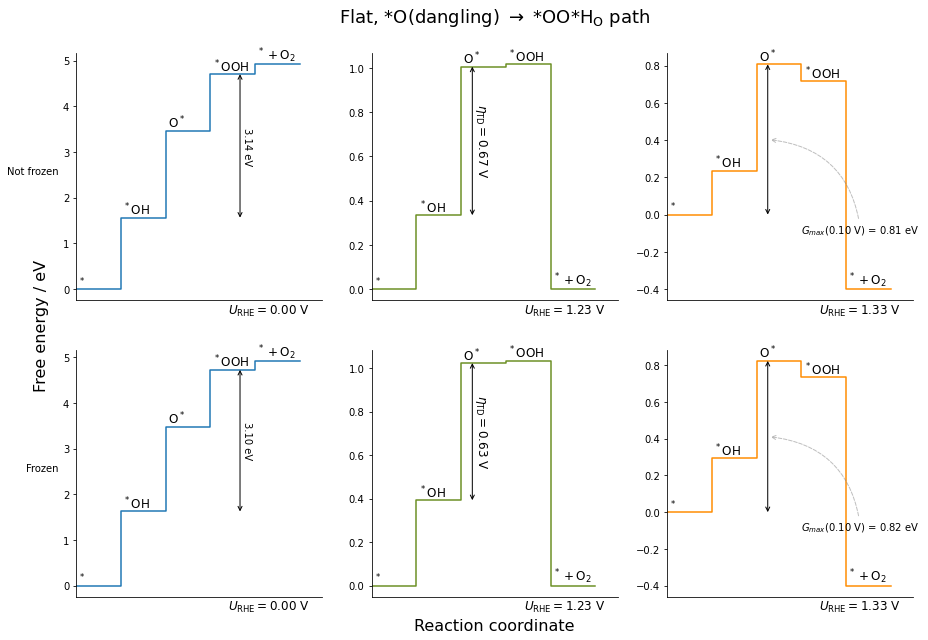

In [200]:
# flat Odang - HOOmin
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(flat_Odang_OOHmin, freeze_flat_Odang_OOHmin, "Flat, O-dangling and OOH-min", axes)
axes[0,1].set_title(r'Flat, *O(dangling) $\rightarrow$ *OO*H$_\mathrm{O}$ path', y=1.1, fontsize=18)
plt.savefig("flat_odang_oohmin.pdf", format='pdf') 
plt.show()

# plt.savefig(str(idx)+"_correctpath" +'.pdf', format='pdf')  

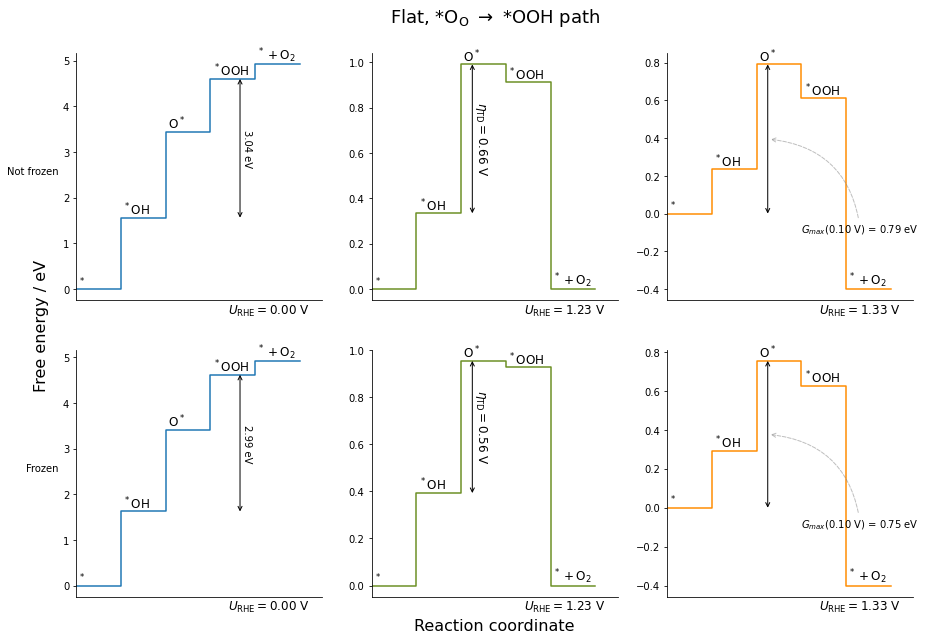

In [201]:
# flat O - HOO
fig, axes = plt.subplots(2, 3, figsize = (15,10),  sharex=True)
g_plot_all(flat_O_OOH, freeze_flat_O_OOH, "Flat, O(2) and OOH-standard", axes)
axes[0,1].set_title(r'Flat, *O$_\mathrm{O}$ $\rightarrow$ *OOH path', y=1.1, fontsize=18)
plt.savefig("flat_o2_ooh.pdf", format='pdf') 
plt.show()

# SRI might be too low, but 

In [208]:
labels = [r'Ridge', #0
          r'Slope *O(dang)-*OOH', #1 
          r'Slope *O$_\mathrm{O}$-*OO*H$_\mathrm{O}$', #2
          r'Flat *O(dang)-*OOH', #3
          r'Flat *O$_\mathrm{O}$-*OO*H$_\mathrm{O}$', #4
          r'Slope *O(dang)-*OO*H$_\mathrm{O}$', #5
          r'Slope *O$_\mathrm{O}$-*OOH',  #6
          r'Flat *O(dang)-*OO*H$_\mathrm{O}$', #7
          r'Flat *O$_\mathrm{O}$-*OOH'] #8

sri = [2.31, 3.43, 2.54, 3.05, 3.13, 3.56, 2.4, 3.14, 3.04]
freeze_sri = [1.96, 3.29, 2.30, 3.06, 3.03, 3.48, 2.12, 3.1, 2.99]

optd = [0.13, 1.24, 0.33, 0.67, 0.66, 1.24, 0.33, 0.67, 0.66]
freeze_optd = [0.35, 1.2, 0.49, 0.63, 0.56, 1.2, 0.49, 0.63, 0.56]

gmax = [0.03, 1.37, 0.34, 0.81, 0.79, 1.37, 0.34, 0.81, 0.79]
freeze_gmax = [0.25, 1.49, 0.39, 0.82, 0.75, 1.49, 0.39, 0.82, 0.75]

x = np.arange(len(labels))
x = np.array([8, 7, 5, 3, 1, 6, 4, 2, 0])

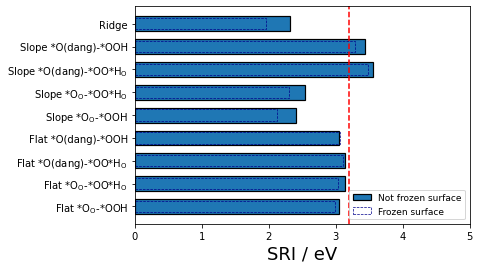

In [212]:
fig, ax = plt.subplots()

ax.barh(x, sri, height = 0.65, ec='k', lw=1.2, label='Not frozen surface')
ax.barh(x, freeze_sri, height=0.50, fc=(0, 0, 0, 0), ls='--', lw=0.7, ec='darkblue', label='Frozen surface')
ax.set_yticks(x, labels=labels, rotation=0)
ax.axvline(3.2, 0, 1, color='red', ls='--')
ax.set_xlabel("SRI / eV", fontsize=18)

ax.set_xlim([0, 5])
ax.legend(loc = 'lower right', fontsize=9)


plt.savefig('sri.pdf', format='pdf', bbox_inches='tight')  
plt.show()

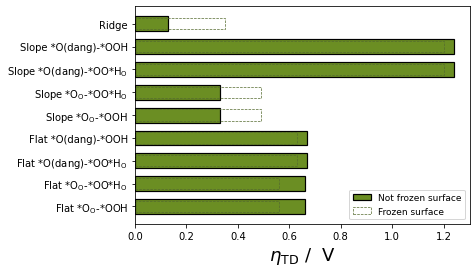

In [215]:
fig, ax = plt.subplots()

ax.barh(x, optd, height=0.65, facecolor='olivedrab', edgecolor='k', lw=1.2, label='Not frozen surface')
ax.barh(x, freeze_optd, height=0.50, fc=(0, 0, 0, 0), ls='--', lw=0.7, edgecolor='darkolivegreen', label='Frozen surface')
ax.set_yticks(x, labels=labels, rotation=0)
ax.set_xlabel(r'$\eta_\mathrm{TD}$ /  V', fontsize=18)

ax.legend(loc = 'lower right', fontsize=9)

plt.savefig('optd.pdf', format='pdf', bbox_inches='tight')  
plt.show()

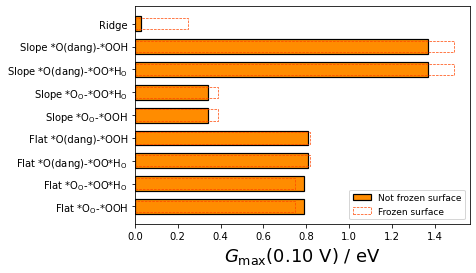

In [216]:
fig, ax = plt.subplots()

ax.barh(x, gmax, height=0.65, facecolor='darkorange', edgecolor='k', lw=1.2, label='Not frozen surface')
ax.barh(x, freeze_gmax, height=0.50, fc=(0, 0, 0, 0), ls='--', lw=0.7, edgecolor='orangered', label='Frozen surface')
ax.set_yticks(x, labels=labels, rotation=0)
ax.set_xlabel(r'$G_\mathrm{max}$(0.10 V) / eV', fontsize=18)

ax.legend(loc = 'lower right', fontsize=9)

plt.savefig('gmax.pdf', format='pdf', bbox_inches='tight')  
plt.show()

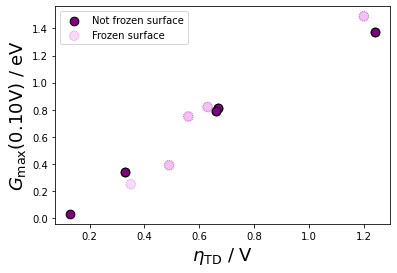

In [169]:
fig, ax = plt.subplots()
ax.scatter(np.array(optd),
           np.array(gmax),
           color='purple',
           s=75,
           edgecolors='k',
           linewidth=1,
           label='Not frozen surface')

ax.scatter(np.array(freeze_optd),
           np.array(freeze_gmax),
           color='violet',
           alpha=0.3,
           s=90,
           edgecolors='purple',
           linewidth=1,
           linestyle=(0, (1, 1)),
           label='Frozen surface')
ax.set_xlabel(r'$\eta_\mathrm{TD}$ / V', fontsize=18)
ax.set_ylabel(r'$G_\mathrm{max}$(0.10V) / eV', fontsize=18)
ax.legend()

plt.savefig('gmax_vs_optd.pdf', format='pdf', bbox_inches='tight')  
plt.show()

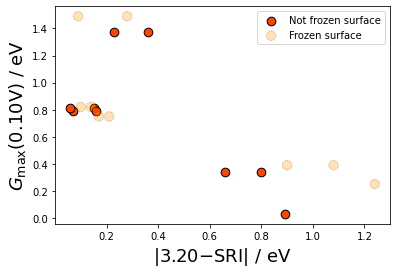

In [190]:
fig, ax = plt.subplots()
ax.scatter(np.absolute(3.2 - np.array(sri)),
           np.array(gmax),
           color='orangered',
           s=75,
           edgecolors='k',
           linewidth=1,
           label='Not frozen surface')

ax.scatter(np.absolute(3.2 - np.array(freeze_sri)),
           np.array(freeze_gmax),
           color='orange',
           alpha=0.3,
           s=90,
           edgecolors='darkred',
           linewidth=1,
           linestyle=(0, (1, 1)),
           label='Frozen surface')
ax.set_xlabel(r'|3.20$-$SRI| / eV', fontsize=18)
ax.set_ylabel(r'$G_\mathrm{max}$(0.10V) / eV', fontsize=18)
ax.legend()

plt.savefig('gmax_vs_sri.pdf', format='pdf', bbox_inches='tight')  
plt.show()